In [139]:
import numpy as np
import random,math
import matplotlib.pyplot as plt
myarray = np.loadtxt('./data_lab2/votes.dat',delimiter=",",dtype=float)
parties = np.loadtxt('./data_lab2/mpparty.dat',skiprows=3,dtype=int)
sexes = np.loadtxt('./data_lab2/mpsex.dat',skiprows=2,dtype=int)
district = np.loadtxt('./data_lab2/mpdistrict.dat',dtype=int)

Aktiva noder:  (58,)


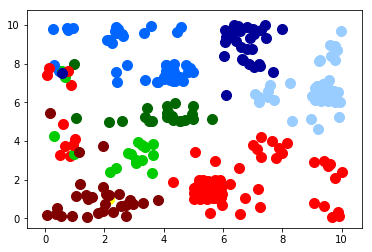

In [140]:
#indata = 32x84
indata = np.reshape(myarray, (-1, 31))


def init_weights(n,m):
    np.random.seed(42)
    weights = np.random.rand(n,m)
    return weights

weights = init_weights(100,31)


def similarity(indata):
    winner = 1000
    winnerNode=0
    for i in range(weights.shape[0]):
        sub = np.subtract(indata,weights[i])
        sim = np.dot(sub.T,sub)
        if sim < winner:
            winner = sim
            winnerNode=i
    return winnerNode

def getNeighbours(size, winner, ind): 
    indexes = []    
    
    winner_x = winner%10
    winner_y=winner//10
    
    for i in range(100):
        x = i%10
        y=i//10
        d = math.sqrt(((winner_x-x)**2)+((winner_y-y)**2))
        if d<size:
            indexes.append(i)
        
    indexes = np.array(indexes)
    updateWeights(indexes, ind)

#Updates weight W[i]
def updateWeights(weightIndex, ind, eta = 0.2):
    for i in np.nditer(weightIndex):
        weights[i] = weights[i] + eta*(np.subtract(ind,weights[i]))

#Trains a SOM
def trainSOM(epochs=20):
    size = 3 #Size of neighbourhood
    #For each pattern in indata
    for epoch in range(epochs): #20 is standard
        for i in range(indata.shape[0]):
            winnerNode=similarity(indata[i]) #Find best node
            getNeighbours(size, winnerNode, indata[i]) #Get list of neighbours with winnerNode in center
        
        #print("Size:",size)
        #Update size of neighbourhood
        if size>=2:
            size-=0.33
        else:
            size=1

def predictSOM():
    pos=[]
    #Loo
    for i in range(indata.shape[0]):
        winnderNodeIndex = similarity(indata[i])
        pos.append([winnderNodeIndex,parties[i]])

    pos = np.array(pos,dtype=object)
    pos = pos[pos[:,0].argsort()]
    
    active_nodes = np.unique(pos[:,0]).shape
    print ("Aktiva noder: ",active_nodes)
    
    colors = {0:"#ffff00",1:"#0066ff",2:"#99ccff",3:"#ff0000",4:"#800000",5:"#00cc00",6:"#000099",7:"#006600"}
    
    for element in pos:
        position = element[0]
        #print(colors[element[1]])
        x = (position%10)+random.random()
        y = position//10+random.random()
        plt.scatter(x,y,s=100,c=colors[element[1]])
    plt.show()
        
            
trainSOM()
predictSOM()

Aktiva noder:  (58,)


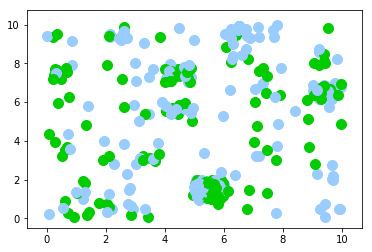

Blue = male, Green = female


In [141]:
def predictSOM2():
    pos=[]

    for i in range(indata.shape[0]):
        winnderNodeIndex = similarity(indata[i])
        pos.append([winnderNodeIndex,sexes[i]])

    pos = np.array(pos,dtype=object)
    pos = pos[pos[:,0].argsort()]
    
    active_nodes = np.unique(pos[:,0]).shape
    print ("Aktiva noder: ",active_nodes)
    
    colors = {0:"#99ccff", 1:"#00cc00"}
    
    for element in pos:
        position = element[0]
        #print(colors[element[1]])
        x = (position%10)+random.random()
        y = position//10+random.random()
        plt.scatter(x,y,s=100,c=colors[element[1]])
    plt.legend()
    plt.show()
    print("Blue = male, Green = female")
    
predictSOM2()

Aktiva noder:  (41,)


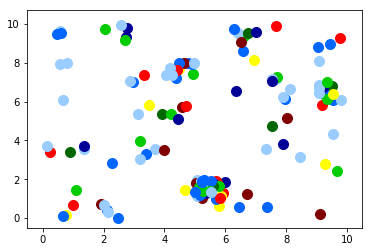

In [142]:
def predictSOM3():
    pos=[]
    #Loo
    for i in range(district.shape[0]):
        if district[i]<9:
            winnderNodeIndex = similarity(indata[i])
            pos.append([winnderNodeIndex,district[i]])

    pos = np.array(pos,dtype=object)
    pos = pos[pos[:,0].argsort()]
    
    active_nodes = np.unique(pos[:,0]).shape
    print ("Aktiva noder: ",active_nodes)
    
    colors = {8:"#ffff00",1:"#0066ff",2:"#99ccff",3:"#ff0000",4:"#800000",5:"#00cc00",6:"#000099",7:"#006600"}
    
    for element in pos:
        position = element[0]
        #print(colors[element[1]])
        x = (position%10)+random.random()
        y = position//10+random.random()
        plt.scatter(x,y,s=100,c=colors[element[1]])
    plt.show()

predictSOM3()